# Image Classification with Logistic Regression

## Import libraries

In [122]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm 

from sklearn.linear_model import LogisticRegression

## Import dataset and preprocess it

### Get the dataset

In [123]:
!chmod 600 /content/kaggle.json #how to keep our api key unavailabe to others

!pip install --upgrade --force-reinstall --no-deps kaggle # update kaggle api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.13-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [124]:
## Get data directly from kaggle
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d cdawn1/messy-vs-clean-room

messy-vs-clean-room.zip: Skipping, found more recently modified local copy (use --force to force download)


In [125]:
## unzip the file
import zipfile

data = zipfile.ZipFile("messy-vs-clean-room.zip")
data.extractall()
data.close()

### Get to know the dataset

In [126]:
for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in 'images'.
There are 2 directories and 0 images in 'images/val'.
There are 0 directories and 10 images in 'images/val/messy'.
There are 0 directories and 10 images in 'images/val/clean'.
There are 2 directories and 0 images in 'images/train'.
There are 0 directories and 96 images in 'images/train/messy'.
There are 0 directories and 96 images in 'images/train/clean'.
There are 3 directories and 0 images in 'images/images'.
There are 2 directories and 0 images in 'images/images/val'.
There are 0 directories and 10 images in 'images/images/val/messy'.
There are 0 directories and 10 images in 'images/images/val/clean'.
There are 2 directories and 0 images in 'images/images/train'.
There are 0 directories and 96 images in 'images/images/train/messy'.
There are 0 directories and 96 images in 'images/images/train/clean'.
There are 0 directories and 10 images in 'images/images/test'.
There are 0 directories and 10 images in 'images/test'.


In [127]:
train_messy = "/content/images/train/messy"
train_clean= "/content/images/train/clean"
test_messy= "/content/images/val/messy"
test_clean= "/content/images/val/clean"

In [128]:
# View an image
def view_random_image(path):

  # Get random images path
  random_image = random.sample(os.listdir(path), k=1)

  # Read in the image and plot it
  img = cv2.imread(path + "/" + random_image[0])

  
  plt.figure(figsize=(8,6))
  plt.imshow(img)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

Image shape: (299, 299, 3)


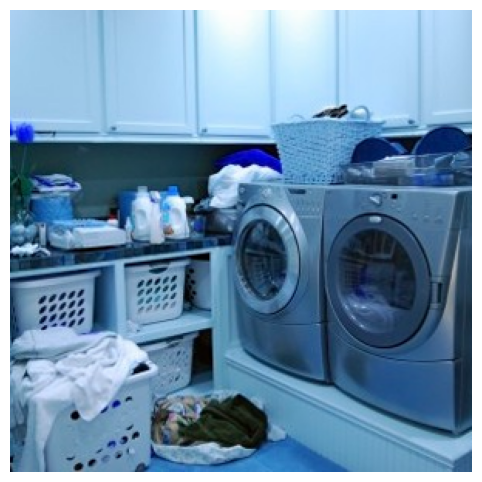

In [129]:
view_random_image(path=train_messy)

Image shape: (299, 299, 3)


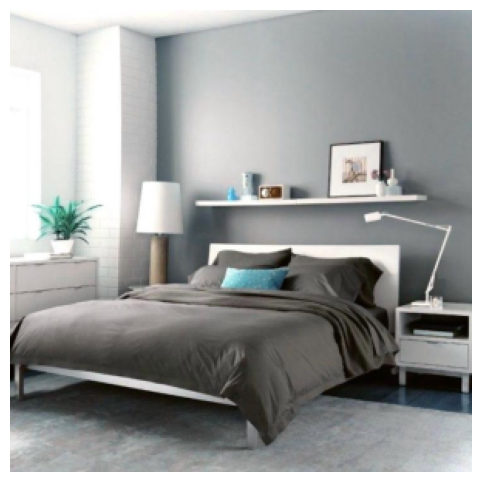

In [130]:
view_random_image(path=train_clean)

### Preprocessing

100%|██████████| 96/96 [00:00<00:00, 247.23it/s]


Text(0.5, 1.0, 'Clean Room in GrayScale')

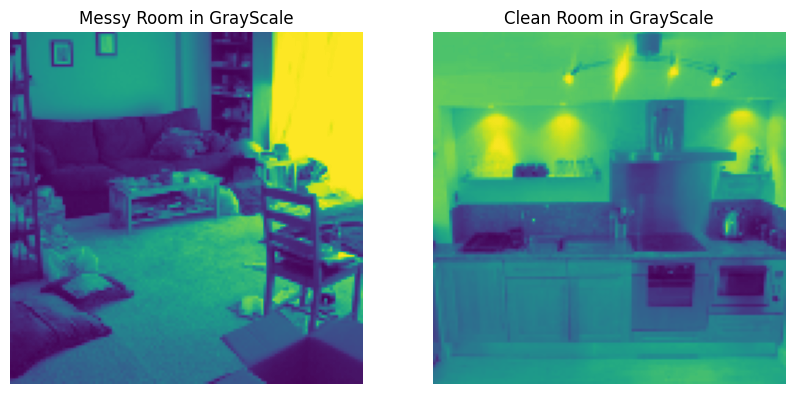

In [131]:
image_size = 128

for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy Room in GrayScale")
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Clean Room in GrayScale")

In [132]:
## Functions to preprocess the dataset and prepare it for training

def train_data_pre(train_messy_path, train_clean_path, image_size):
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy_path)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size)).flatten()
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean_path)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data

def test_data_pre(test_messy_path, test_clean_path, image_size):
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy_path)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size)).flatten()
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean_path)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [133]:
train_data = train_data_pre(train_messy_path=train_messy,
           train_clean_path=train_clean,
           image_size=128)

100%|██████████| 96/96 [00:00<00:00, 236.93it/s]


In [134]:
train_data[0].shape

(16384,)

In [135]:
test_data = test_data_pre(test_messy_path=test_messy,
           test_clean_path=test_clean,
           image_size=128)

100%|██████████| 10/10 [00:00<00:00, 220.30it/s]


In [136]:
## concatenating train_data and test data
x_data=np.concatenate((train_data,test_data),axis=0)
## feature scaling using min max normalization
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [137]:
x_data[0]

array([0.25490196, 0.48235294, 0.48627451, ..., 0.0627451 , 0.0627451 ,
       0.07058824])

In [138]:
def y_data_creation():
  z1 = np.zeros(96) # we have 96 train messy images
  o1 = np.ones(96) # we have 96 train clean images
  Y_train = np.concatenate((o1, z1), axis=0)
  z = np.zeros(10) # we have 10 test messy images
  o = np.ones(10) # we have 10 test clean images
  Y_test = np.concatenate((o, z), axis=0)

  y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)
  return y_data

In [139]:
y_data = y_data_creation()

In [140]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 16384)
Y shape:  (212, 1)


In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (180, 16384)
x test:  (32, 16384)
y train:  (180, 1)
y test:  (32, 1)


## Training the model

In [142]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test)
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.94
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        18
         1.0       0.93      0.93      0.93        14

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



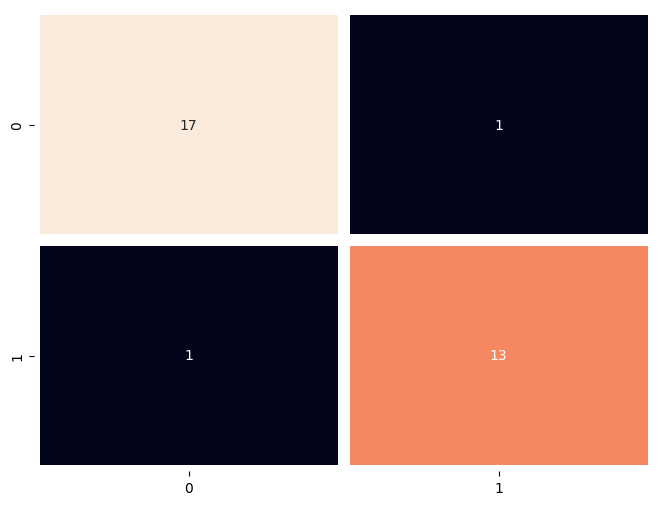

In [144]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , cbar=False)
plt.show()